In [143]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [145]:
df = pd.read_csv('C:/Users/60166/Documents/BACKUP  2021/Documents/1. SHAZWANI/Phd entropy/Entropy_all.csv')

In [146]:
df

,Gender,Age,Race,Highest educational qualification,Types of Occupations,Total monthly household income,State of residence,Status of Housing,Type of residence,Do you think that timber will be the green and environmental friendly material for construction,...,BELIEF AND SOURCE OF INFORMATION_I know the information of timber from media social can be trusted,BELIEF AND SOURCE OF INFORMATION_I believe that the use of timber in the construction of house and building is very good,BELIEF AND SOURCE OF INFORMATION_I can verify any of the information on timber based on my own knowledge,"PREFERENCE_Overall, I prefer to use timber due to low cost of timber","PREFERENCE_Overall, I prefer to use timber because it is durable","PREFERENCE_Overall, I prefer to use timber because it is considered fire resistant","PREFERENCE_Overall, I prefer to use timber because the valid source of information",Do you know that timber can be designed to be more resistant and durable,GENERAL COMMENTS_How likely are you to use timber to build your residence or business premise,GENERAL COMMENTS_Do you agree if the government imposes a policy that at least 10% of a building has to be made of timber
0,0.449718,0.527877,0.267068,0.494472,0.228561,0.524182,0.376370,0.373440,0.346074,0.144442,...,0.530146,0.375727,0.354040,0.483438,0.515507,0.375727,0.359665,0.313090,0.530376,0.220583
1,0.449718,0.527877,0.267068,0.494472,0.166094,0.467835,0.376370,0.373440,0.346074,0.144442,...,0.343108,0.375727,0.354040,0.272024,0.388233,0.473336,0.404501,0.313090,0.525237,0.220583
2,0.449718,0.525562,0.267068,0.369692,0.516279,0.524182,0.279772,0.373440,0.328496,0.144442,...,0.518299,0.529233,0.527632,0.530217,0.530595,0.530536,0.521441,0.313090,0.530376,0.432166
3,0.449718,0.525562,0.267068,0.369692,0.516279,0.524182,0.376370,0.524859,0.522601,0.144442,...,0.518299,0.527817,0.527632,0.530217,0.530595,0.530536,0.529955,0.500975,0.530376,0.220583
4,0.449718,0.527877,0.267068,0.369692,0.290996,0.467835,0.376370,0.373440,0.328496,0.144442,...,0.283565,0.527817,0.527632,0.483438,0.530595,0.473336,0.521441,0.313090,0.525237,0.220583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.449718,0.525562,0.328496,0.369692,0.516279,0.524182,0.440839,0.524859,0.522601,0.144442,...,0.343108,0.529233,0.527111,0.530217,0.530595,0.530536,0.521441,0.500975,0.530376,0.220583
2403,0.527245,0.527877,0.328496,0.369692,0.312966,0.354751,0.235352,0.524859,0.098232,0.144442,...,0.530146,0.529233,0.354040,0.457062,0.388233,0.466769,0.404501,0.313090,0.525237,0.220583
2404,0.449718,0.421452,0.328496,0.494472,0.390644,0.467835,0.409439,0.373440,0.522601,0.343108,...,0.098232,0.103735,0.084846,0.380192,0.237581,0.473336,0.359665,0.500975,0.525237,0.220583
2405,0.527245,0.527877,0.267068,0.369692,0.312966,0.354751,0.235352,0.524859,0.098232,0.144442,...,0.530146,0.527817,0.527632,0.483438,0.429795,0.473336,0.529955,0.313090,0.525237,0.220583


In [147]:
df = np.array(df)

In [148]:
df

array([[0.44971785, 0.5278772 , 0.26706813, ..., 0.31308964, 0.53037623,
        0.22058274],
       [0.44971785, 0.5278772 , 0.26706813, ..., 0.31308964, 0.52523686,
        0.22058274],
       [0.44971785, 0.52556177, 0.26706813, ..., 0.31308964, 0.53037623,
        0.43216569],
       ...,
       [0.44971785, 0.42145243, 0.32849566, ..., 0.50097505, 0.52523686,
        0.22058274],
       [0.52724495, 0.5278772 , 0.26706813, ..., 0.31308964, 0.52523686,
        0.22058274],
       [0.44971785, 0.5278772 , 0.26706813, ..., 0.31308964, 0.52523686,
        0.22058274]])

In [150]:
import numpy as np
from numpy.random import default_rng


def FireflyAlgorithm(function, dim, lb, ub, max_evals, pop_size=2407, alpha=1.0, betamin=1.0, gamma=0.01, seed=None): #pop_size = rows
    rng = default_rng(seed)
    #fireflies = rng.uniform(lb, ub, (pop_size, dim))
    fireflies = df
    intensity = np.apply_along_axis(function, 1, fireflies)
    best = np.min(intensity)

    evaluations = pop_size
    new_alpha = alpha
    search_range = ub - lb

    while evaluations <= max_evals:
        new_alpha *= 0.97
        for i in range(pop_size):
            for j in range(pop_size):
                if intensity[i] >= intensity[j]:
                    r = np.sum(np.square(fireflies[i] - fireflies[j]), axis=-1)
                    beta = betamin * np.exp(-gamma * r)
                    steps = new_alpha * (rng.random(dim) - 0.5) * search_range
                    fireflies[i] += beta * (fireflies[j] - fireflies[i]) + steps
                    fireflies[i] = np.clip(fireflies[i], lb, ub)
                    intensity[i] = function(fireflies[i])
                    evaluations += 1
                    best = min(intensity[i], best)
    return best

In [151]:
import numpy as np

x = df #df in np.array form

def sphere(x):
    return np.sum(x ** 2) #function


best = FireflyAlgorithm(function=sphere, dim=112, lb=0, ub=1, max_evals=50) #dimension = number of features/columns, max_evals = number of iterations

print(best)

14.087698281304966


In [152]:
def michalewicz(x):
    result = reduce(lambda acc, x: acc + np.sin(x) * np.power(np.sin((0 + 1) * np.power(x, 2) / np.pi), 2 * 10), x, 0.)
    return -1.0*result

best = FireflyAlgorithm(function=michalewicz, dim=112, lb=0, ub=1, max_evals=50) #dimension = number of features/columns, max_evals = number of iterations

print(best)

-2.0861704810596834e-20


# FA LAIN

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,cm
import random
import operator
from functools import reduce

In [154]:
df2 = df[0:5]

In [155]:
df2

array([[0.44971785, 0.5278772 , 0.26706813, 0.49447151, 0.22856139,
        0.52418165, 0.37637037, 0.37344025, 0.34607351, 0.14444244,
        0.5247318 , 0.38482907, 0.50383848, 0.31648324, 0.01905193,
        0.48690379, 0.31394004, 0.48903695, 0.3887851 , 0.36590695,
        0.47336882, 0.33312837, 0.40619391, 0.24466797, 0.0864838 ,
        0.50989297, 0.19221401, 0.5284758 , 0.52769392, 0.26338463,
        0.52437912, 0.21518294, 0.24276913, 0.48249614, 0.44282339,
        0.45772342, 0.4900857 , 0.30838869, 0.53073707, 0.53062138,
        0.25080524, 0.48805793, 0.38949954, 0.48999164, 0.50082259,
        0.30838869, 0.33598537, 0.47976209, 0.27618862, 0.21862336,
        0.39656152, 0.36208635, 0.25689029, 0.46942453, 0.28339349,
        0.18203466, 0.37825909, 0.2037763 , 0.22643214, 0.35433834,
        0.14444244, 0.23991169, 0.31436474, 0.45772342, 0.33720466,
        0.5289574 , 0.20726445, 0.27528227, 0.39269602, 0.14444244,
        0.23800061, 0.31943509, 0.2757356 , 0.21

In [156]:
def sphere(x):
    return np.sum(x ** 2) #function

In [157]:
def michalewicz(x):
    result = reduce(lambda acc, x: acc + np.sin(x) * np.power(np.sin((0 + 1) * np.power(x, 2) / np.pi), 2 * 10), x, 0.)
    return -1.0*result

In [158]:
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt((x[0]**2+x[1]**2)/2)) - np.exp(0.5*(np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))) + 20 + np.exp(1)

In [159]:
def dejong(x):
    ans = 0
    for i in range(min(len(x),256)):
        ans+=np.power(x[i],4)
    return ans

In [160]:
def yang(x):
#     Yang N.2 function
    temp1 = 0
    temp2 = 0
    for i in range(min(len(x),16)):
        temp2+=np.sin(np.power(x[i],2))
        temp1+=np.absolute(x[i])
    ans =  temp1*np.exp(temp2*-1)
    return ans

In [161]:
def rosenbrock(x):
    ans=0.0
    for i in range(min(len(x),16)):
        ans+=(100.0*(x[i]-x[i]**2)**2 + (1-x[i])**2)
    return ans

In [162]:
def griewank(x):
    ans = 1.0
    inner_product = 1.0
    inner_sum = 0.0
    i=0
    while i < (len(x)):#change to while
        inner_sum += (x[i] ** 2)
        inner_product *= (np.cos(x[i] / np.sqrt(i + 1)))
        i+=1
    ans += (inner_sum * (1. / 4000.) - inner_product)
    return ans

In [163]:
def shubert(x):
        temp1 = 0
        temp2 = 0
        i=0
        while i < (5): #Change to while
            temp1 += ((i+1)*np.cos((i+1)+(i+2)*x[0]))
            temp2 += ((i+1)*np.cos((i+1)+(i+2)*x[1]))
            i+=1
        return temp1*temp2

In [164]:
def rastrigin(x):
    ans = 0.0
    i=0
    while i< (len(x)):#Change to while
        ans += (x[i] ** 2 - (10. * np.cos(2 * np.pi * x[i])))
        i+=1
    ans += 10. * len(x)
    return ans

In [165]:
def schwefel(x):
    ans=418.982887*len(x)
    for i in range(min(len(x),128)):
        ans-=x[i]*np.sin(np.sqrt(np.abs(x[i])))
    return ans

In [166]:
def easom(x):
    return -1.0*np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0] - np.pi)**2 - (x[1] - np.pi)**2)

In [167]:
class Firefly():
    def __init__(self, alpha, beta, gamma, upper_boundary, lower_boundary, function_dimension):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.__intensity = None
        self.lower_boundary = lower_boundary
        self.upper_boundary = upper_boundary
        self.__position = np.array([random.uniform(self.lower_boundary, self.upper_boundary) for x in range(function_dimension)])
    
    
    @property
    def intensity(self):
        return self.__intensity

        
    @property
    def position(self):
        return self.__position
    
    @position.setter
    def position(self, value):
        self.__position = value

    def move_towards(self, better_position):
        # euclidean distance
        distance = np.linalg.norm(self.__position - better_position)
        self.__position = self.__position + self.beta*np.exp(-self.gamma*(distance**2)) * (better_position-self.__position) +  self.alpha*(random.uniform(0, 1)-0.5)
        self.check_boundaries()

    def random_walk(self, area):
        self.__position = np.array([random.uniform(cord-area, cord+area) for x, cord in np.ndenumerate(self.__position)])
    def update_intensity(self, func):
        self.__intensity = -1*func(self.__position)
    def check_boundaries(self):
        for i, cord in np.ndenumerate(self.__position):
            if cord < self.lower_boundary:
                self.__position[i] = self.lower_boundary
            elif cord > self.upper_boundary:
                self.__position[i] = self.upper_boundary
            else:
                self.__position[i] = cord

In [168]:
class FireflyProblem():
    
    def __init__(self, function, firefly_number, upper_boundary=5.12, lower_boundary=-5.12, alpha=2, beta=2, gamma=0.97, iteration_number=50, interval=500, continuous=False):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function_dimension = 112
        self.upper_boundary = upper_boundary
        self.lower_boundary = lower_boundary
        self.iteration_number = iteration_number
        self.fireflies = [Firefly(self.alpha,self.beta,self.gamma,self.upper_boundary,self.lower_boundary, self.function_dimension) for x in range(firefly_number)]
        self.function = function
        self.interval = interval
        self.best = None
        self.continuous = continuous
        self.cost=[]
        i=0
        while i<(len(self.fireflies)): #Change to while
            (self.fireflies)[i].update_intensity(self.function)
            i+=1

    def run(self):
        y = df2
        x = df2
        X, Y = np.meshgrid(x, y)
        z = self.function([X, Y])        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)  # pylint: disable=no-member
        fig.colorbar(cs)
        x_init = []
        y_init = []
        i=0
        while i<(len(self.fireflies)):#change to while
            x_init.append((self.fireflies)[i].position[0])
            y_init.append((self.fireflies)[i].position[1])
            i+=1
        particles, = ax.plot(x_init, y_init, 'ro', ms=6)
        rectangle = plt.Rectangle([self.lower_boundary, self.lower_boundary],self.upper_boundary-self.lower_boundary,self.upper_boundary-self.lower_boundary, ec='none', lw=2, fc='none')
        ax.add_patch(rectangle)
#         self.plot()

        def init():
            particles.set_data([], [])
            rectangle.set_edgecolor('none')
            return particles, rectangle

        def animate(i): #Generate animation and visualization
            x = []
            y = []
            ms = int(50. * fig.get_figwidth()/fig.dpi)
            rectangle.set_edgecolor('k')
            fig.canvas.set_window_title('Iteration %s/%s' % (i, self.iteration_number))
            if i ==0:
                print("reset the fireflies")
                self.best = None

            for idx, firefly in enumerate(self.fireflies):
                if i == 0:
                    firefly.__position = np.array([x_init[idx], y_init[idx]])
                    firefly.update_intensity(self.function)
                    fig.canvas.set_window_title('Initialization')
                x.append(firefly.position[0])
                y.append(firefly.position[1])
            self.step()
            particles.set_data(x, y)
            particles.set_markersize(ms)
            return particles, rectangle        
        graph = animation.FuncAnimation(fig, animate, frames=self.iteration_number+1, interval=self.interval, blit=True, init_func=init, repeat=self.continuous)
        plt.show()
        if (not self.best or self.fireflies[0].intensity > self.best):
            self.best = self.fireflies[0].intensity
        if(self.function==michalewicz):
            graph.save('firefly_michalewicz.gif')
        elif(self.function==easom):
            graph.save('firefly_easom.gif')            
        elif(self.function==shubert):
            graph.save('firefly_shubert.gif')            
        elif(self.function==ackley):
            graph.save('firefly_ackley.gif')
        elif(self.function==rosenbrock):
            graph.save('firefly_rosenbrock.gif')
        elif(self.function==dejong):
            graph.save('firefly_dejong.gif')
        elif(self.function==griewank):
            graph.save('firefly_griewank.gif')
        elif(self.function==yang):
            graph.save('firefly_yang.gif')            
        elif(self.function==rastrigin):
            graph.save('firefly_rastrigin.gif')
    def step(self):
        (self.fireflies).sort(key=operator.attrgetter('intensity'), reverse=True)
        for i in self.fireflies:
            for j in self.fireflies:
                if j.intensity > i.intensity:
                    i.move_towards(j.position)
                    i.update_intensity(self.function)
     
        if (not self.best or (self.fireflies[0].intensity > self.best) ):
            self.best = self.fireflies[0].intensity
        if(self.function==michalewicz):
            gmin = -1.8013
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
        elif(self.function==easom):
            gmin = -1
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
         
        elif(self.function==shubert):
            gmin = -186.7309
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
            
        elif(self.function==ackley):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==rosenbrock):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))

        elif(self.function==dejong):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==griewank):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==yang):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==rastrigin):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        (self.fireflies)[0].random_walk(0.1)
        (self.fireflies)[0].update_intensity(self.function)
    
    def plot(self):
        X_Axis=range(1,self.iteration_number+2)
        plt.plot(X_Axis,self.cost)
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.show()

In [169]:
def run_firefly_algorithm(optimizer,fireflies_number = 40,upper_boundary=5.12, lower_boundary=-5.12, alpha=2, beta=2, gamma=0.97, iteration_number=10, interval=500):
    out = FireflyProblem(optimizer, fireflies_number,upper_boundary, lower_boundary, alpha, beta, gamma, iteration_number, interval)
    out.run()
    out.plot()

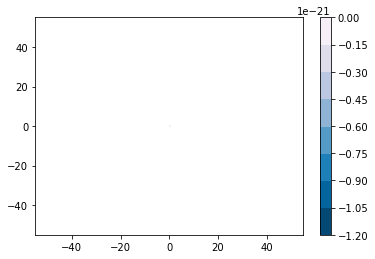

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: 2.6041147052591853, Overall best Accuracy: 144.56862850492337
Overall best intensity: 3.9524201885895027, Overall best Accuracy: 219.42042905620957
Overall best intensity: 4.8279425773848965, Overall best Accuracy: 268.0254581349524
Overall best intensity: 5.079049087780199, Overall best Accuracy: 281.9657518336867
Overall best intensity: 6.672613197990772, Overall best Accuracy: 370.43319813416826
Overall best intensity: 9.760326189241077, Overall best Accuracy: 541.8490084517335
Overall best intensity: 9.760326189241077, Overall best Accuracy: 541.8490084517335
Overall best intensity: 12.687489056842539, Overall best Accuracy: 704.3518046323511
Overall best intensity: 12.687489056842539, Overall best Accuracy: 704.3518046323511
Overall best intensity: 12.687489056842539, Overall best Accuracy: 704.3518046323511
Overall best intensity: 12.687489056842539, Overall best Accuracy: 704.3518046323511


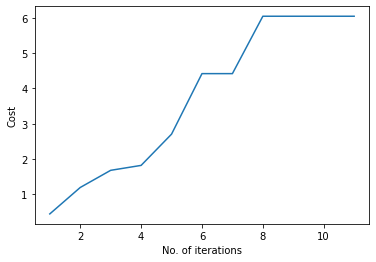

In [170]:
run_firefly_algorithm(michalewicz,10,50,-50,2, 2,0.97, 10,100)

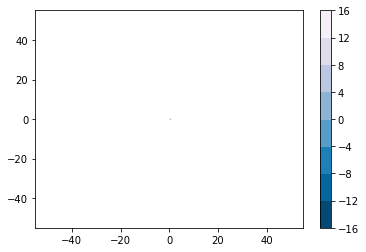

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: 17.357593477075, Overall best Accuracy: 9.295512139166572
Overall best intensity: 88.10470943762104, Overall best Accuracy: 47.18271557499109
Overall best intensity: 136.44823609091932, Overall best Accuracy: 73.07212469436999
Overall best intensity: 136.44823609091932, Overall best Accuracy: 73.07212469436999
Overall best intensity: 136.44823609091932, Overall best Accuracy: 73.07212469436999
Overall best intensity: 136.44823609091932, Overall best Accuracy: 73.07212469436999


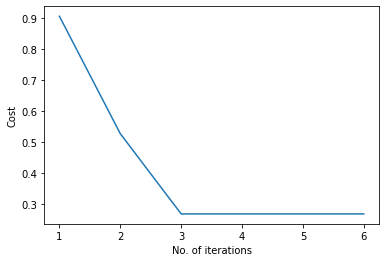

In [171]:
run_firefly_algorithm(shubert,10,50,-50,2, 2,0.97, 5,100)

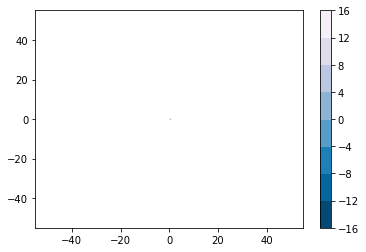

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: 48.6945691153387, Overall best Accuracy: 26.077402891186587
Overall best intensity: 81.70254590434125, Overall best Accuracy: 43.75416489951114
Overall best intensity: 81.70254590434125, Overall best Accuracy: 43.75416489951114


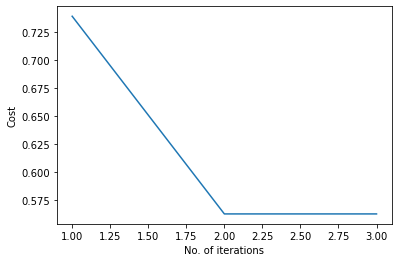

In [172]:
run_firefly_algorithm(shubert,10,50,-50,2, 2,0.97, 2,100)

# CODING LAIN

In [241]:
# Required Libraries
import numpy  as np
import random
import math
import os

In [242]:
# Function
def target_function():
    return

In [279]:
# Function: Initialize Variables
def initial_fireflies(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    position = np.zeros((swarm_size, len(min_values)+1))
    for i in range(0, swarm_size):
        for j in range(0, len(min_values)):
             position[i,j] = random.uniform(min_values[j], max_values[j])
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])
    return position

In [283]:
# Function: Initialize Variables
def initial_fireflies(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    position = np.zeros((swarm_size, len(min_values)+2))
    for i in range(0, swarm_size):
        for j in range(0, len(min_values)):
             position[i,j] = random.uniform(min_values[j], max_values[j])
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])
        print(position)
    return position

In [284]:
initial_fireflies(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], target_function = shubert)

[[ 3.08435308  0.68827373  0.         -3.60177784]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[ 3.08435308  0.68827373  0.         -3.60177784]
 [ 0.92239102  4.5784097   0.         10.30798903]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[ 3.08435308  0.68827373  0.         -3.60177784]
 [ 0.92239102  4.5784097   0.         10.30798903]
 [-1.83747098 -0.72641756  0.         38.6328762 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[ 3.08435308  0.68827373  0.         -3.60177784]
 [ 0.92239102  4.5784097   0.         10.30798903]
 [-1.83747098 -0.72641756  0.         38.6328762 ]
 [-0.41991179  1.77944189  0.          5.47045184]
 [ 0.          0.          0

array([[ 3.08435308,  0.68827373,  0.        , -3.60177784],
       [ 0.92239102,  4.5784097 ,  0.        , 10.30798903],
       [-1.83747098, -0.72641756,  0.        , 38.6328762 ],
       [-0.41991179,  1.77944189,  0.        ,  5.47045184],
       [ 3.28613797, -4.48826858,  0.        , -9.82996114]])

In [269]:
# Function: Distance Calculations
def euclidean_distance(x, y):
    distance = 0
    for j in range(0, len(x)):
        distance = (x[j] - y[j])**2 + distance       
    return distance**(1/2)

In [270]:
# Function: Beta Value
def beta_value(x, y, gama = 1, beta_0 = 1):
    rij  = euclidean_distance(x, y)
    beta = beta_0*math.exp(-gama*(rij)**2)
    return beta

In [271]:
# Function: Ligth Intensity
def ligth_value(light_0, x, y, gama = 1):
    rij   = euclidean_distance(x, y)
    light = light_0*math.exp(-gama*(rij)**2)
    return light

In [272]:
# Function: Update Position
def update_position(position, x, y, alpha_0 = 0.2, beta_0 = 1, gama = 1, firefly = 0, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    for j in range(0, len(x)):
        epson = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1) - (1/2)
        position[firefly, j] = np.clip((x[j] + beta_value(x, y, gama = gama, beta_0 = beta_0)*(y[j] - x[j]) + alpha_0*epson), min_values[j], max_values[j])
    position[firefly, -1] = target_function(position[firefly, 0:position.shape[1]-1])
    return position

In [285]:
# FA Function
def firefly_algorithm(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], generations = 50, alpha_0 = 0.2, beta_0 = 1, gama = 1, target_function = target_function):
    count    = 0    
    position = initial_fireflies(swarm_size = swarm_size, min_values = min_values, max_values = max_values, target_function = target_function)
    while (count <= generations):
        print("Generation: ", count, " f(x) = ", position[position[:,-1].argsort()][0,:][-1])
        for i in range (0, swarm_size):
            for j in range(0, swarm_size):
                if (i != j):
                    firefly_i = np.copy(position[i, 0:position.shape[1]-1])
                    firefly_j = np.copy(position[j, 0:position.shape[1]-1])           
                    ligth_i   = ligth_value(position[i,-1], firefly_i, firefly_j, gama = gama)
                    ligth_j   = ligth_value(position[j,-1], firefly_i, firefly_j, gama = gama)
                    if (ligth_i > ligth_j):
                        position = update_position(position, firefly_i, firefly_j, alpha_0 = alpha_0, beta_0 = beta_0, gama = gama, firefly = i, min_values = min_values, max_values = max_values, target_function = target_function)
        count = count + 1
    best_firefly = np.copy(position[position[:,-1].argsort()][0,:])
    print(best_firefly)
    return 

In [274]:
def shubert(x):
        temp1 = 0
        temp2 = 0
        i=0
        while i < (5): #Change to while
            temp1 += ((i+1)*np.cos((i+1)+(i+2)*x[0]))
            temp2 += ((i+1)*np.cos((i+1)+(i+2)*x[1]))
            i+=1
        return temp1*temp2

In [275]:
initial_fireflies(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], target_function = shubert)

[[-1.39414639 -3.3399339  15.86782162]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[-1.39414639 -3.3399339  15.86782162]
 [-4.763078   -3.03803299  2.94858988]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[-1.39414639 -3.3399339  15.86782162]
 [-4.763078   -3.03803299  2.94858988]
 [-2.91161707 -3.7004514  -1.66904694]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[-1.39414639 -3.3399339  15.86782162]
 [-4.763078   -3.03803299  2.94858988]
 [-2.91161707 -3.7004514  -1.66904694]
 [ 0.73238453 -4.93248776 -9.13956476]
 [ 0.          0.          0.        ]]
[[-1.39414639 -3.3399339  15.86782162]
 [-4.763078   -3.03803299  2.94858988]
 [-2.91161707 -3.7004514  -1.66904694]
 [ 0.73238453 -4.93248776 -9.13956476]
 [ 4.44557482  4.16293741 13.84299179]]


array([[-1.39414639, -3.3399339 , 15.86782162],
       [-4.763078  , -3.03803299,  2.94858988],
       [-2.91161707, -3.7004514 , -1.66904694],
       [ 0.73238453, -4.93248776, -9.13956476],
       [ 4.44557482,  4.16293741, 13.84299179]])

In [286]:
firefly_algorithm(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], generations = 3, alpha_0 = 0.2, beta_0 = 1, gama = 1, target_function = shubert)

[[-1.28363357 -3.50157004  0.         25.52723563]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[-1.28363357 -3.50157004  0.         25.52723563]
 [-3.87334128  2.66356379  0.         -4.05907079]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[-1.28363357 -3.50157004  0.         25.52723563]
 [-3.87334128  2.66356379  0.         -4.05907079]
 [ 3.45277581 -2.24272777  0.          2.60804726]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[-1.28363357 -3.50157004  0.         25.52723563]
 [-3.87334128  2.66356379  0.         -4.05907079]
 [ 3.45277581 -2.24272777  0.          2.60804726]
 [-1.17358346  4.86350217  0.         44.8576493 ]
 [ 0.          0.          0

IndexError: list index out of range